In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

In [4]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [6]:
data.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(1094, 6)

In [9]:
data.nunique()

Sales Person      25
Country            6
Product           22
Date             168
Amount           827
Boxes Shipped    385
dtype: int64

In [10]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


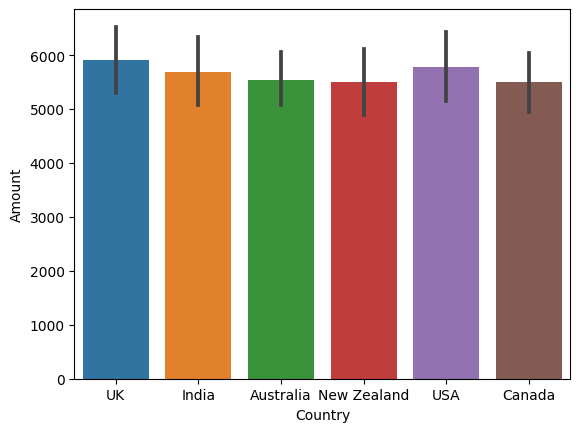

In [11]:
# data['Amount'] = pd.to_numeric(data['Amount'].str[1:],errors='coerce')
data['Amount'] = data['Amount'].str[1:].str.replace(',','').astype('int')
sns.barplot(x='Country',y='Amount',data=data)
plt.show()

In [12]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


In [13]:
top_products = data.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

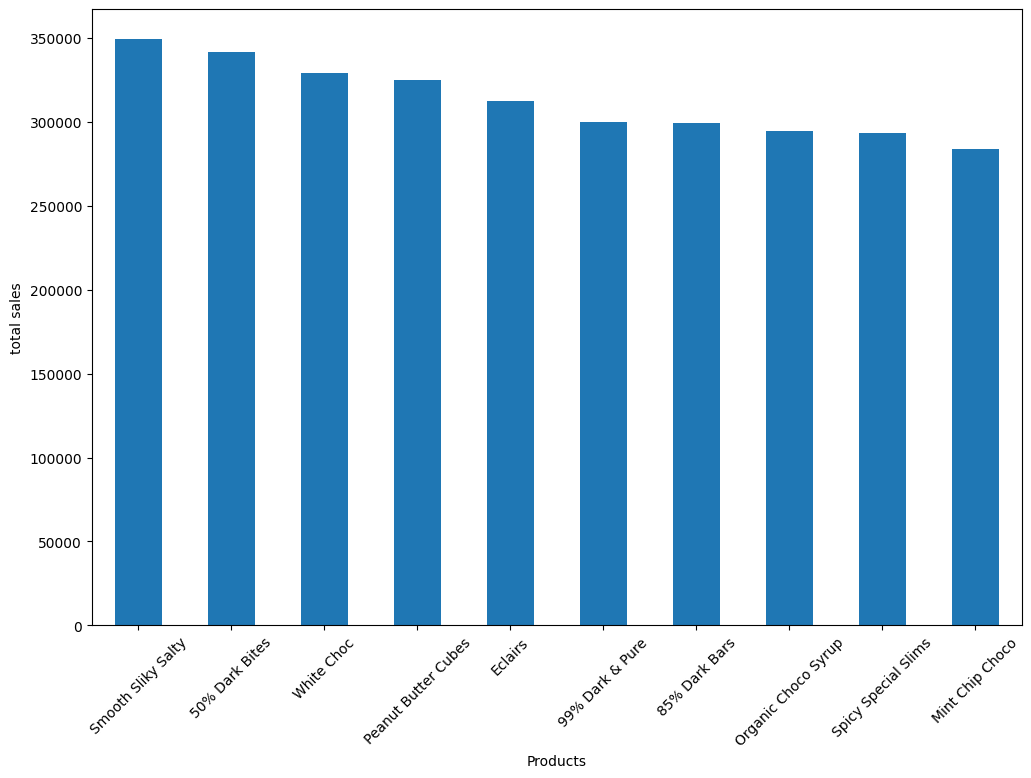

In [14]:
# top_products.plot(kind='bar',figsize=(13,5))
# plt.xlabel('Products',fontsize=14,weight='bold')
# plt.ylabel('Sum of slaes',fontsize=14,weight='bold')
# plt.show()
top_products.plot(kind='bar',figsize=(12,8),xlabel='Products',ylabel='total sales')
plt.xticks(rotation=45)
plt.show()

In [15]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


In [16]:
top_salesPerson = data.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5)

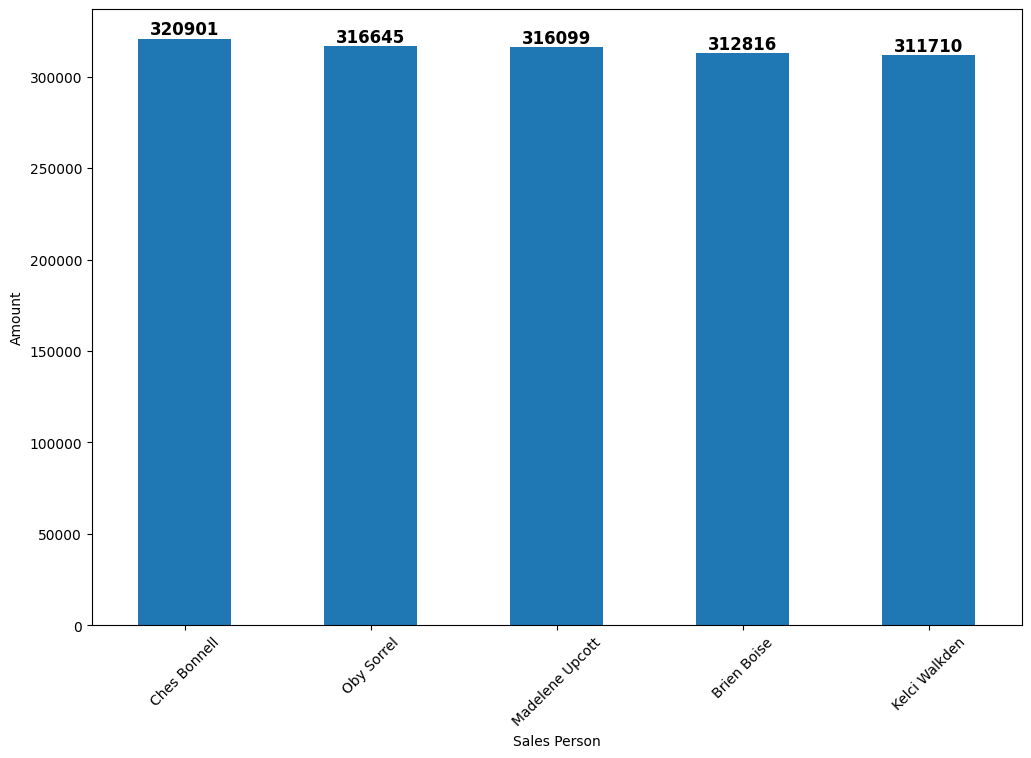

In [17]:
ax = top_salesPerson.plot(kind='bar',figsize=(12,8),xlabel='Sales Person',ylabel='Amount')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,  # X position
            p.get_height() + 0.1,         # Y position
            int(p.get_height()),          # Count value
            ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [18]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685,184


In [19]:
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.strftime('%B')

<ipython-input-19-f33e4fd58000>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [20]:
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,January
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,August
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,July
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,April
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,February
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410,323,May
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559,119,June
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574,217,July
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086,384,July


In [21]:
month_wiseSales = data.groupby('month')['Amount'].sum().sort_values(ascending=False)

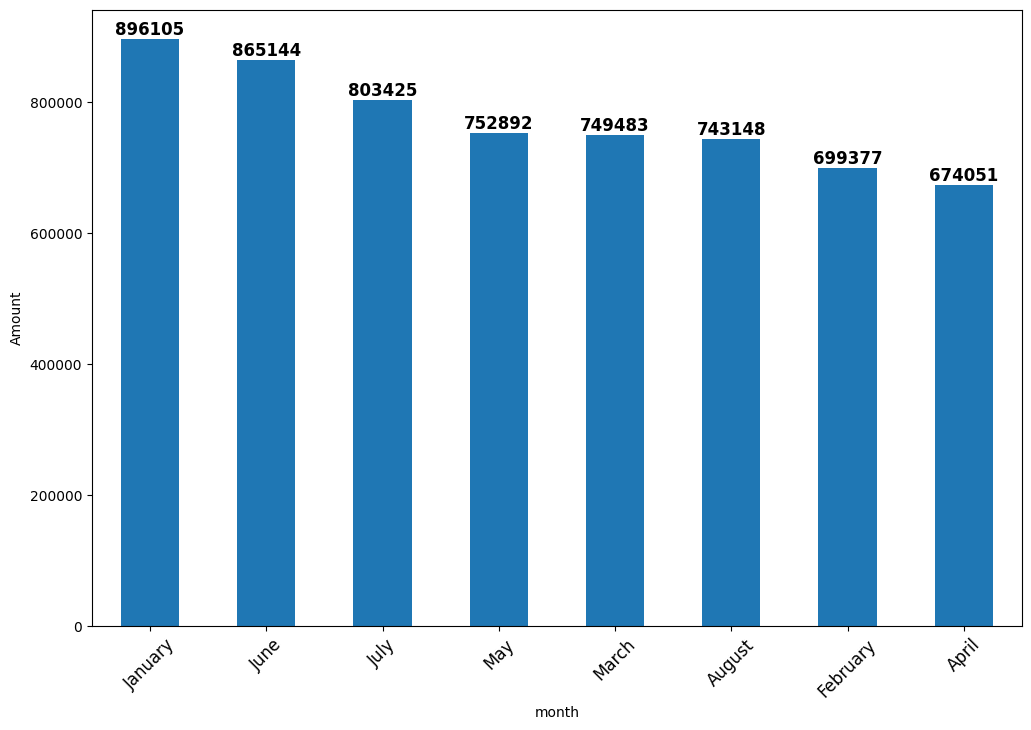

In [22]:
ax = month_wiseSales.plot(kind='bar',figsize=(12,8),xlabel='month',ylabel='Amount')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2
           ,p.get_height() + 0.1,
           int(p.get_height()),
           ha='center',va='bottom',fontweight='bold',fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.show()

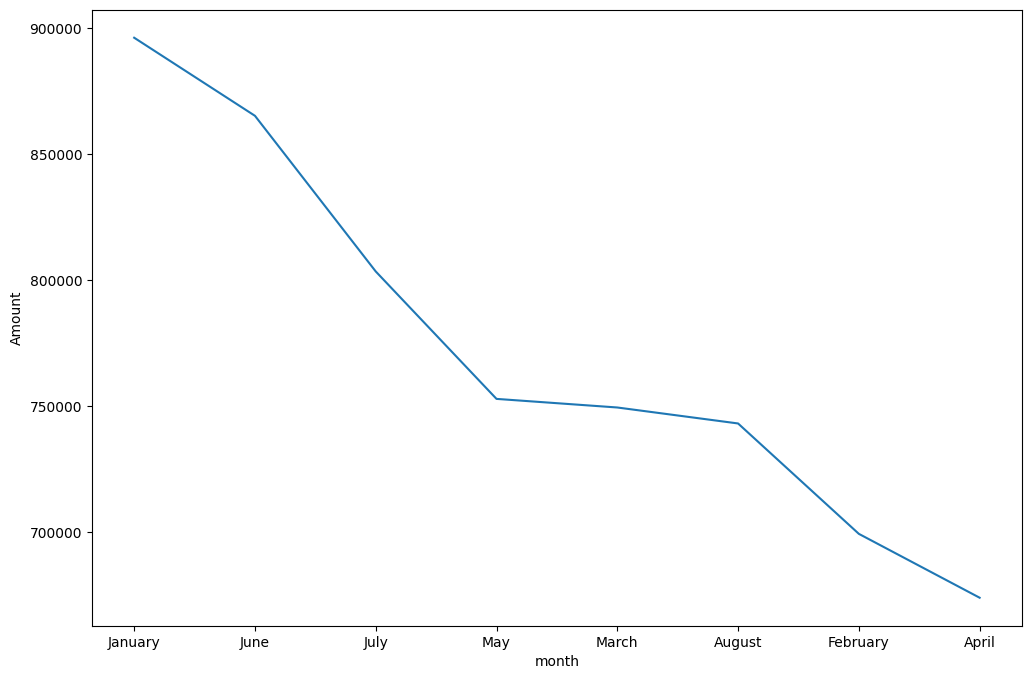

In [23]:
ax = month_wiseSales.plot(kind='line',figsize=(12,8),xlabel='month',ylabel='Amount')
plt.show()

In [24]:
country_wiseSales = data.groupby('Country')['Amount'].sum().sort_values(ascending=False)

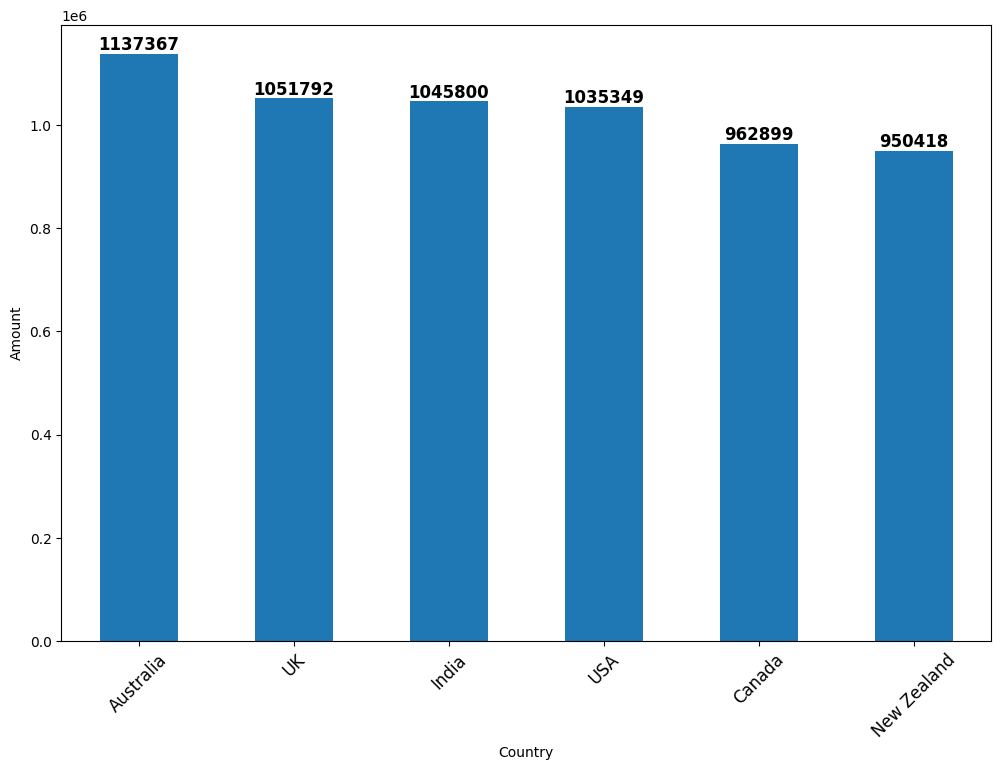

In [25]:
ax = country_wiseSales.plot(kind='bar',figsize=(12,8),xlabel='Country',ylabel='Amount')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2
           ,p.get_height() + 0.1,
           int(p.get_height()),
           ha='center',va='bottom',fontweight='bold',fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.show()